In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
import torchvision
import torchvision.transforms
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from torch.utils.data import DataLoader
from torchsummary import summary
from IPython.core.debugger import set_trace

from Tools import Trainer

## Loading datasets

In [2]:
from Tools.Dataloader import datasets_loader

normalize = torchvision.transforms.Normalize((0.4895832, 0.4546405, 0.41594946), 
                                (0.2520022, 0.24522494, 0.24728711))
train_val_transforms = torchvision.transforms.Compose([
                            torchvision.transforms.RandomCrop(64),
                            torchvision.transforms.RandomHorizontalFlip(),
                            torchvision.transforms.ToTensor(),
                            normalize])

norm_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                normalize])       
                                                  
test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.FiveCrop(64), # this is a list of PIL Images
    torchvision.transforms.Lambda(lambda crops: torch.stack([norm_transforms(crop) for crop in crops])), # returns a 4D tensor
])
                                                  
train_loader, valid_loader, test_loader = datasets_loader(train_val_transforms, test_transforms)

In [3]:
print(train_loader.dataset.dataset)
print(test_loader.dataset)

Dataset ImageFolder
    Number of datapoints: 19998
    Root Location: ./data/trainset/
    Transforms (if any): Compose(
                             RandomCrop(size=(64, 64), padding=0)
                             RandomHorizontalFlip(p=0.5)
                             ToTensor()
                             Normalize(mean=(0.4895832, 0.4546405, 0.41594946), std=(0.2520022, 0.24522494, 0.24728711))
                         )
    Target Transforms (if any): None


## Hyper-parameters

In [4]:
hyperparams = {'num_epochs': 50,
               'lr0' :0.1, 
               'dropout':0.2,
               'gamma': 1,
               'adjust_lr': False,
               'init_weights':True,
               'save_checkpoint': True      
                  }
cuda_available = torch.cuda.is_available()

## Creating the model

In [5]:
from Classifier.VGG import VGG16_Dropout

model = VGG16_Dropout(hyperparams)
if cuda_available:
    model = model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=hyperparams['lr0'])
criterion = nn.CrossEntropyLoss()

In [6]:
summary(model, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,792
              ReLU-2           [-1, 64, 64, 64]               0
   GaussianDropout-3           [-1, 64, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          36,928
              ReLU-5           [-1, 64, 64, 64]               0
         MaxPool2d-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]          73,856
              ReLU-8          [-1, 128, 32, 32]               0
   GaussianDropout-9          [-1, 128, 32, 32]               0
           Conv2d-10          [-1, 128, 32, 32]         147,584
             ReLU-11          [-1, 128, 32, 32]               0
        MaxPool2d-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         295,168
             ReLU-14          [-1, 256,

## Training 

In [7]:
from Tools.Trainer import Trainer

trainer = Trainer(model, optimizer, criterion, train_loader, valid_loader, test_loader, hyperparams)
nll_train, nll_valid, acc_train, acc_valid =  trainer.train_model()
print('Done...')

------ Epoch # 1 ------
 Iteration 40: TRAIN 0.6936
 Iteration 80: TRAIN 0.6935
 Iteration 120: TRAIN 0.6934
------ Epoch # 2 ------
 Iteration 160: TRAIN 0.6940
 Iteration 200: TRAIN 0.6935
 [Loss] TRAIN 0.6930 / VALID 0.6932
 [ACC] TRAIN 0.5008 / VALID 0.4855
new checkpoint is saved!
 Iteration 240: TRAIN 0.6935
 Iteration 280: TRAIN 0.6926
------ Epoch # 3 ------
 Iteration 320: TRAIN 0.6933
 Iteration 360: TRAIN 0.6927
 Iteration 400: TRAIN 0.6930
 [Loss] TRAIN 0.6923 / VALID 0.6921
 [ACC] TRAIN 0.5625 / VALID 0.5676
new checkpoint is saved!
 Iteration 440: TRAIN 0.6922
------ Epoch # 4 ------
 Iteration 480: TRAIN 0.6924
 Iteration 520: TRAIN 0.6904
 Iteration 560: TRAIN 0.6899
------ Epoch # 5 ------
 Iteration 600: TRAIN 0.6841
 [Loss] TRAIN 0.6938 / VALID 0.6897
 [ACC] TRAIN 0.5225 / VALID 0.5345
new checkpoint is saved!
 Iteration 640: TRAIN 0.6837
 Iteration 680: TRAIN 0.6811
 Iteration 720: TRAIN 0.6895
------ Epoch # 6 ------
 Iteration 760: TRAIN 0.6934
 Iteration 800: TRA

 Iteration 6000: TRAIN 0.0590
 [Loss] TRAIN 0.0521 / VALID 0.3563
 [ACC] TRAIN 0.9803 / VALID 0.9069
new checkpoint is saved!
 Iteration 6040: TRAIN 0.0549
 Iteration 6080: TRAIN 0.0580
------ Epoch # 42 ------
 Iteration 6120: TRAIN 0.0468
 Iteration 6160: TRAIN 0.0997
 Iteration 6200: TRAIN 0.0601
 [Loss] TRAIN 0.0364 / VALID 0.3178
 [ACC] TRAIN 0.9856 / VALID 0.9089
new checkpoint is saved!
 Iteration 6240: TRAIN 0.0671
------ Epoch # 43 ------
 Iteration 6280: TRAIN 0.0377
 Iteration 6320: TRAIN 0.0412
 Iteration 6360: TRAIN 0.0560
 Iteration 6400: TRAIN 0.0434
 [Loss] TRAIN 0.0267 / VALID 0.3094
 [ACC] TRAIN 0.9908 / VALID 0.9059
new checkpoint is saved!
------ Epoch # 44 ------
 Iteration 6440: TRAIN 0.0451
 Iteration 6480: TRAIN 0.0338
 Iteration 6520: TRAIN 0.0540
------ Epoch # 45 ------
 Iteration 6560: TRAIN 0.0499
 Iteration 6600: TRAIN 0.0363
 [Loss] TRAIN 0.0462 / VALID 0.3419
 [ACC] TRAIN 0.9823 / VALID 0.9059
new checkpoint is saved!
 Iteration 6640: TRAIN 0.0395
 Itera

## Visualization

### accuracy and loss plots

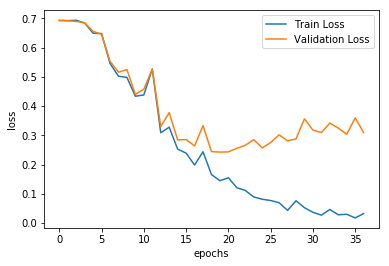

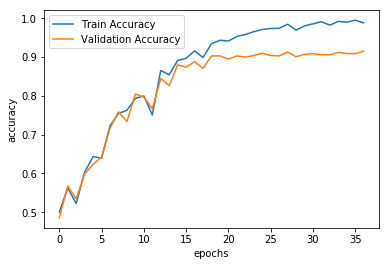

In [13]:
import Tools.Visualization as V
V.plots(nll_train, nll_valid, acc_train, acc_valid)

In [17]:
print(len(nll_train))

37


### Confusion Matrix

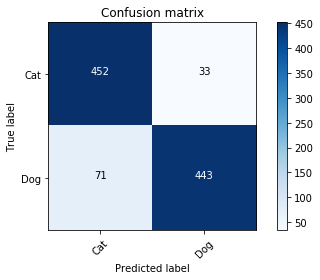

In [9]:
import Tools.Visualization as V
cnf_matrix = trainer.confusion_matrix()
V.plot_confusion_matrix(cnf_matrix)

## Saving the model

In [10]:
torch.save(model, "./Experiments/VGG-Dropout-Augmented-5crop")

## Generate Submission

In [12]:
import Tools.Trainer as T
results = T.predict_test_set_5crop(model, test_loader)
# print(results.size())
T.generate_submission(results)

Done...
